<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/%ED%95%9C%EA%B8%80%ED%82%A4%EC%9B%8C%EB%93%9C_%EB%B6%84%EC%84%9D(%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 키워드(keyword) 분석

* 텍스트 시각화는 주로 텍스트에 있는 키워드(keyword)라는 핵심어를 가지고 수행
* 키워드는 핵심어로 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어라고 할 수 있음.
* 키워드(핵심어) 분석은 불용어 제거와 어간 추출 및 형태소 분석 등의 자연어 처리를 시행한 후 형태소나 명사의 등장 빈도를 분석


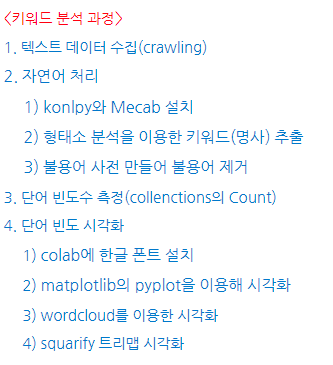

##### 1. 데이터 수집

* 한글 형태소 분석기인 KoNLPy에서 제공하는 말뭉치(corpus) 중 대한민국 헌법을 사용


In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from konlpy.corpus import kolaw
corpus = kolaw.open('constitution.txt').read()
print(len(corpus))
print(corpus[:100])


18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


###### 2. 자연어처리

* 텍스트 정제

In [5]:
import re

def text_clean(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern, '', text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern, '', text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거    
    text = re.sub(pattern, '', text)
    pattern = '([a-zA-Z0-9]+)'   # 알파벳, 숫자 제거  
    text = re.sub(pattern, '', text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern, '', text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern, '', text)
    return text  

In [6]:
corpus = text_clean(corpus)
corpus[:100]


'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 민주이념을 계승하고 조국의 민주개혁과 평화적 통일의 사명에 입각하'

* 형태소 분석

In [1]:
# Mecab 설치

!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [7]:
from konlpy.tag import Mecab

mecab = Mecab()
tokens = mecab.nouns(corpus)

print(tokens[:50]) 


['대한민국', '헌법', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입각', '정의', '인도', '동포', '애', '민족', '단결', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유', '민주', '기본', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '능력', '최고']


* 불용어 처리(stopwords) 및 한 자 이상 단어 추출

In [20]:
# 불용어 처리

stop_words = "기타 헌법 경우"
stop_words = stop_words.split(" ")

st_tokens = []
for token in tokens:
  if token not in stop_words:
    st_tokens.append(token)

tokens = st_tokens    # 변수의 편의성을 위해 다시 tokens로 변수명을 바꿔줌.

In [11]:
# 한 자 이상 단어 추출
tokens = [token for token in tokens if len(token) > 1]
print(tokens[:50])

['대한민국', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입각', '정의', '인도', '동포', '민족', '단결', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유', '민주', '기본', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '능력', '최고', '도로', '발휘']


#### 3. 단어수 측정

* 단어 빈도수는 collections 라이브러리의 Counter 함수를 사용


In [21]:
from collections import Counter

nouns_counter = Counter(tokens)
top_nouns = dict(nouns_counter.most_common(30))    # 딕셔너리 형태로 상위 30개 저장
top_nouns


{'제조': 136,
 '법률': 121,
 '대통령': 84,
 '국가': 73,
 '국민': 69,
 '국회': 69,
 '필요': 31,
 '위원': 30,
 '보장': 24,
 '법원': 24,
 '국무': 24,
 '정부': 23,
 '사항': 23,
 '회의': 22,
 '제항': 22,
 '자유': 21,
 '권리': 21,
 '선거': 21,
 '경제': 20,
 '국회의원': 20,
 '의무': 19,
 '직무': 19,
 '국무총리': 19,
 '임명': 19,
 '조직': 18,
 '이상': 18,
 '임기': 18,
 '의결': 17,
 '공무원': 17,
 '범위': 16}

#### 4. 코랩(colab)에서 한글 폰트 설정

* 코랩(colab)에는 한글 폰트가 없기 때문에 maplotlib에서 한글을 출력시키려면 한글 폰트를 설치 및 설정해 주어야 함.
* Matplotlib은 TrueTypeFont(*. ttf) 확장자를 사용하기 때문에 나눔바른고딕을 사용하도록 함.
* 코랩에서는 설정이 완료된 후 '메뉴' => '런타임' => '런타임 다시 시작'을 수행한 후 다시 짜놓은 코드를 실행시켜줘야 함.

* 코랩에 한글 폰트(나눔바른고딕설치)

In [13]:
!apt -qq -y install fonts-nanum 
# -qq:메시지를 출력하지 않음(오류 제외), -y: 모든 질문 표시 없이 예라고 답하기

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


* matplotlib에서 한글 폰트를 사용할 수 있도록 설정

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 높은 해상도로 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBamkend.figure_format = 'retina'

# matplotlib가 사용하는 폰트 경로 확인
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 경로를 전달해 폰트이름을 가져옴
font_name = fm.FontProperties(fname=fontpath, size=10).get_name() 

# matplotlib가 사용할 글꼴을 나눔바른고딕으로 변경
plt.rc('font', family=font_name)

# 폰트 매니저 리빌딩
fm._rebuild()

# 메뉴' => '런타임' => '런타임 다시 시작' 후 다시 코드 실행

#### 단어 빈도수 그래프

* 대한민국헌법에 대해 명사를 추출한 후 상위 빈도수 30개까지 구해 놓았음(top_noun). 
* 파이썬의 그래프 시각화 도구인 matplotlib.pypot()을 이용해 막대그래프를 생성

([<matplotlib.axis.YTick at 0x7f48fca2a280>,
 [Text(0, 0, '제조'),
  Text(0, 0, '법률'),
  Text(0, 0, '대통령'),
  Text(0, 0, '국가'),
  Text(0, 0, '국민'),
  Text(0, 0, '국회'),
  Text(0, 0, '필요'),
  Text(0, 0, '위원'),
  Text(0, 0, '보장'),
  Text(0, 0, '법원'),
  Text(0, 0, '국무'),
  Text(0, 0, '정부'),
  Text(0, 0, '사항'),
  Text(0, 0, '회의'),
  Text(0, 0, '제항'),
  Text(0, 0, '자유'),
  Text(0, 0, '권리'),
  Text(0, 0, '선거'),
  Text(0, 0, '경제'),
  Text(0, 0, '국회의원'),
  Text(0, 0, '의무'),
  Text(0, 0, '직무'),
  Text(0, 0, '국무총리'),
  Text(0, 0, '임명'),
  Text(0, 0, '조직'),
  Text(0, 0, '이상'),
  Text(0, 0, '임기'),
  Text(0, 0, '의결'),
  Text(0, 0, '공무원'),
  Text(0, 0, '범위')])

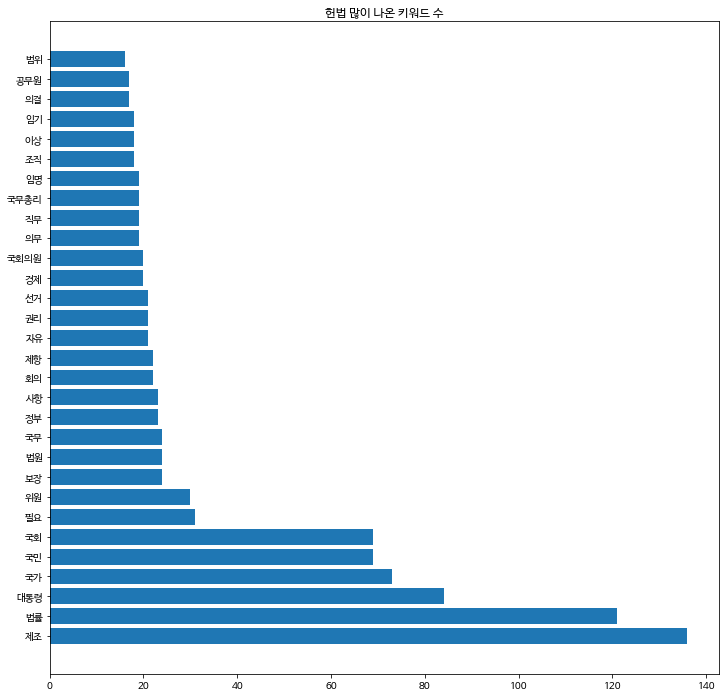

In [23]:
plt.figure(figsize=(12, 12))               # 이미지 사이즈를 설정하고 이미지 생성
y_height = range(0, len(top_nouns))       # y축 높이 지정
plt.barh(y_height, top_nouns.values())     # 수평막대 그리기
plt.title("헌법 많이 나온 키워드 수")      #  차트 제목 설정
plt.yticks(y_height, top_nouns.keys())     #  y축 틱에 label 붙이기

#### 워드클라우드 그리기

* wordcloud 패키지를 설치하고 WordCloud 모듈을 불러온 그런 후 WordCloud의 배경과 폰트를 지정하고 WordCloud를 생성(generate)

* 워드 클라우드 파라미터

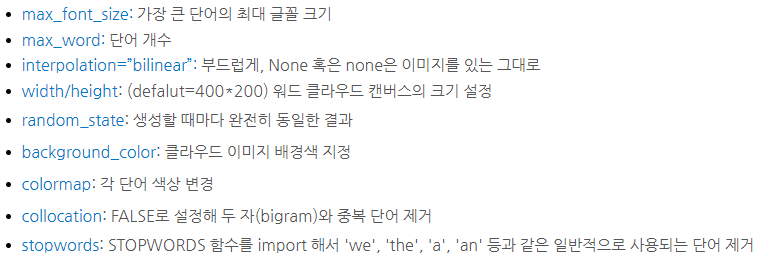

In [17]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


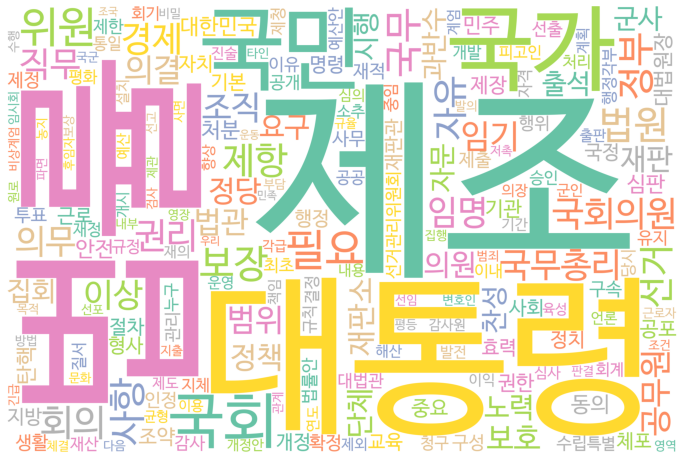

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# 배경색과 폰트지정

wc= WordCloud(width = 3000, height = 2000, random_state=1, 
              background_color='white', colormap='Set2', 
              collocations=False, stopwords = STOPWORDS,
              font_path='./font/NanumBarunGothic.ttf')

# 워드클아우드 생성
wc.generate_from_frequencies(nouns_counter)    # 빈도수가 구해진 전체 단어plt.

# pyplot을 이용해 시각화
plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")
plt.show()

###### Mask 사용(파이썬 마스크 가능 이미지 사용)

*Google, Bing 등 검색 엔진에서 "WordCloud Mask Images"를 검색해서 찾아야 함.
* '순백색'(white)에 대한 array 변환 값 "255" 값이 포함되어 있어야만 마스크 기능을 사용
* 해당 이미지를 Numpy를 이용해 색상을 array 데이터로 바꿔보면 '순백색'인 "255" 값을 가지고 있다는 것을 확인할 수 있음.

In [24]:
import numpy as np
from PIL import Image


mask = np.array(Image.open("../content/law.jpg"))
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

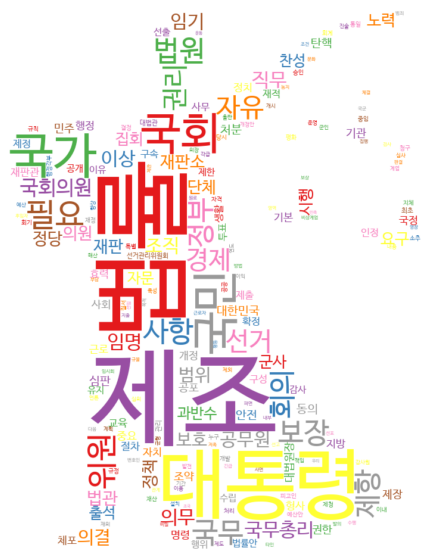

In [27]:
from wordcloud import WordCloud, STOPWORDS      # WordCloud와 STOPWORD 호출
import matplotlib.pyplot as plt                 # matplotlib.pyplot를 plt로 단축
import numpy as np                              # 이미지를 array 데이터로 변환
from PIL import Image                           # 이미지 분석 및 처리

mask = np.array(Image.open("../content/law.jpg")) # 이미지를 불어와 arrary 데이터로 변환

wc = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set1', 
                      collocations=False, stopwords = STOPWORDS, 
                      font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      mask=mask)

wc.generate_from_frequencies(nouns_counter)            # 워드 클라우드 생성

plt.figure(figsize=(10,10))                            # 이미지 크기 지정
plt.imshow(wc, interpolation="bilinear")               # 픽셀을 부드럽게 색으로 채움
plt.axis("off")
plt.show()

###### Mask 사용(파이썬 마스크 불가능 이미지 사용)

* Numpy를 이용해 "0" 값을 "255"로 변환해서 사용

In [29]:
import numpy as np
from PIL import Image

mask = np.array(Image.open("../content/law_logo.png"))
mask

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=uint8)

In [30]:
trans_mask = np.where(mask == 1, 255, mask)
trans_mask

array([[  2,   2,   2, ..., 255, 255, 255],
       [  2,   2,   2, ..., 255, 255, 255],
       [  2,   2,   2, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   2,   2,   2],
       [255, 255, 255, ...,   2,   2,   2],
       [255, 255, 255, ...,   2,   2,   2]], dtype=uint8)

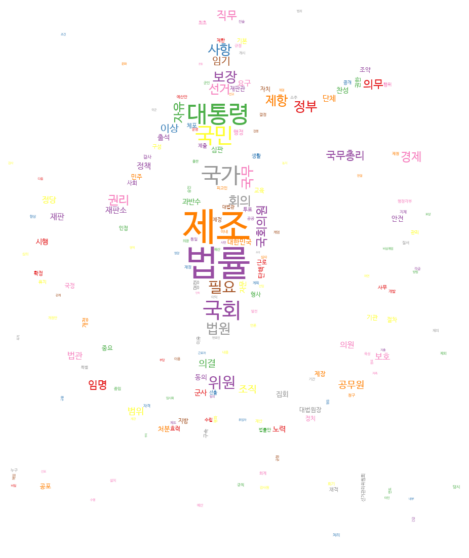

In [31]:
from wordcloud import WordCloud, STOPWORDS  # WordCloud와 STOPWORD 호출
import matplotlib.pyplot as plt             # matplotlib.pyplot를 plt로 단축
import numpy as np                          # 이미지를 array 데이터로 변환
from PIL import Image                       # 이미지 분석 및 처리

mask = np.array(Image.open("../content/law_logo.png")) # 이미지를 불어와 arrary 데이터로 변환

wc = WordCloud(width = 3000, height = 2000, random_state=1, 
               background_color='white', colormap='Set1', 
               collocations=False, stopwords = STOPWORDS, 
               font_path='./font/NanumBarunGothic.ttf', 
               mask=trans_mask)

wc.generate_from_frequencies(nouns_counter)            # 워드 클라우드 생성

plt.figure(figsize=(10,10))               # 이미지 크기 지정
plt.imshow(wc, interpolation="bilinear")   # 픽셀을 부드럽게 색으로 채움
plt.axis("off")
plt.show()